In [229]:
import torch
import importlib

import utils
import diffusion

importlib.reload(utils)
importlib.reload(diffusion)

from utils import load_transformed_CIFAR10_automobiles
from utils import visualize_images
from diffusion import Diffusion

# Load dataset

In [230]:
batch_size = 5
max_samples = 100

data, dataloader = load_transformed_CIFAR10_automobiles(batch_size=batch_size, max_samples=max_samples)

Files already downloaded and verified


# Train model

In [ ]:
diffusion = Diffusion()

diffusion.train(dataloader, batch_size=batch_size, T=1000, epochs=100)

Epoch 0 | Step 000 | Loss: 1.0191171169281006 
Epoch 1 | Step 000 | Loss: 0.6766260862350464 
Epoch 2 | Step 000 | Loss: 0.38724443316459656 
Epoch 3 | Step 000 | Loss: 0.21008123457431793 
Epoch 4 | Step 000 | Loss: 0.12148305773735046 
Epoch 5 | Step 000 | Loss: 0.1678103804588318 
Epoch 6 | Step 000 | Loss: 0.18989324569702148 
Epoch 7 | Step 000 | Loss: 0.15480640530586243 


In [228]:
# for image, label in dataloader:
#     t = torch.randint(0, 1000, (5, 1, 1, 1))
#     noised_image, noise = diffusion.q(image, t)
#     print(noised_image.shape)
#     break

# Visualize forward process

torch.Size([5, 3, 32, 32]) tensor([1, 1, 1, 1, 1])
1001


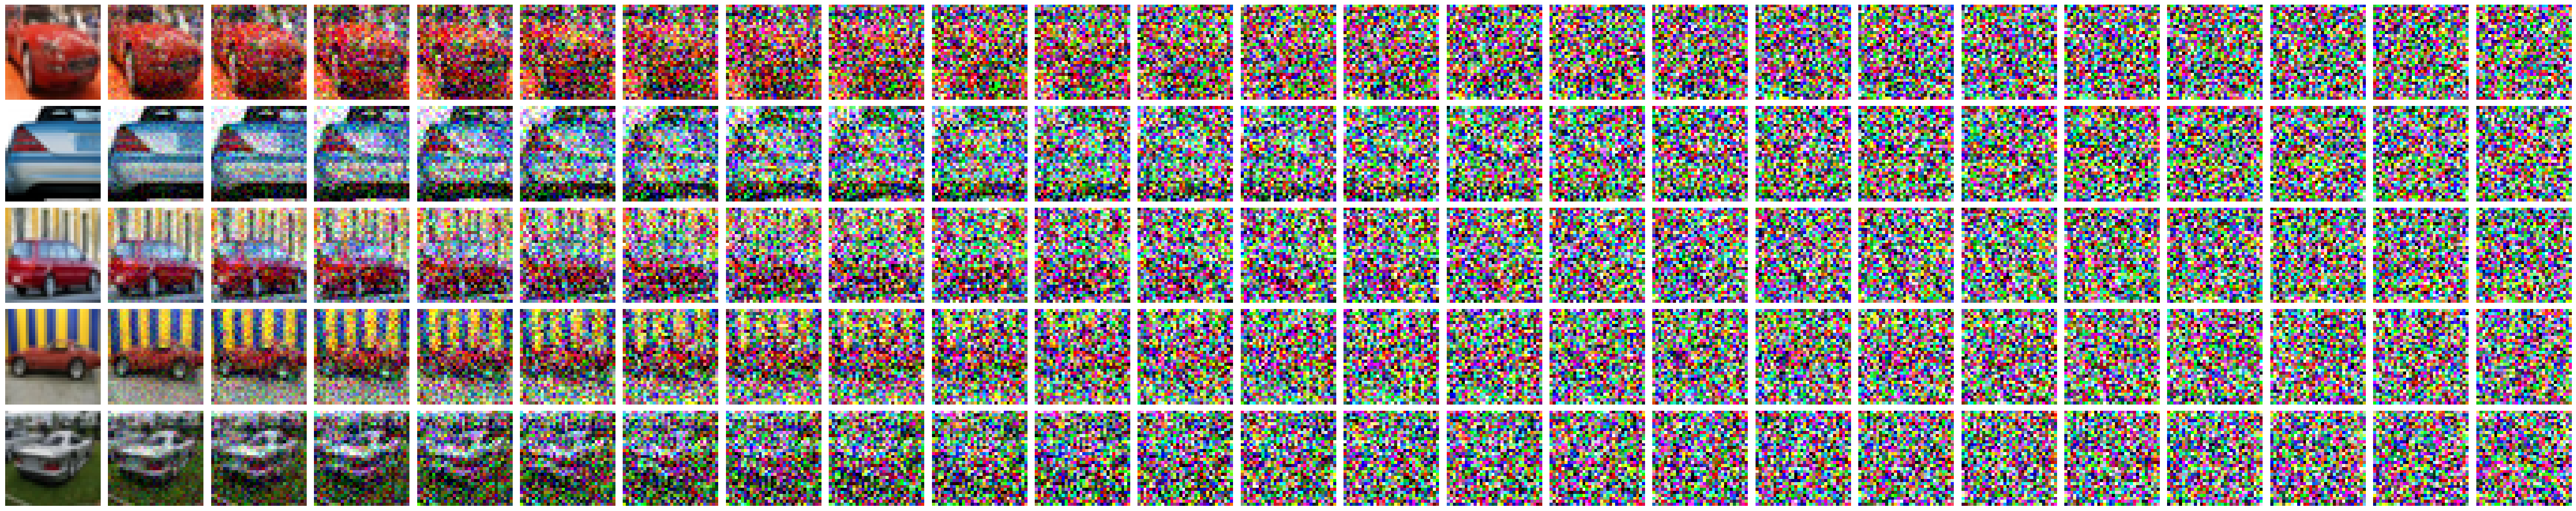

In [216]:
n_rows = batch_size
n_cols = 25
T = 1000
steps = int(T / n_cols)

for images, labels in dataloader:
    print(images.shape, labels)
    forward_process_list = diffusion.q_iteratively(x_0=images, t=T)  # List of batches
    print(len(forward_process_list))
    visualize_images(forward_process_list[::steps], n_rows=n_rows, n_cols=n_cols)
    break


# Visualize backward process

In [206]:
reverse_process_list = diffusion.infer(T=1000)

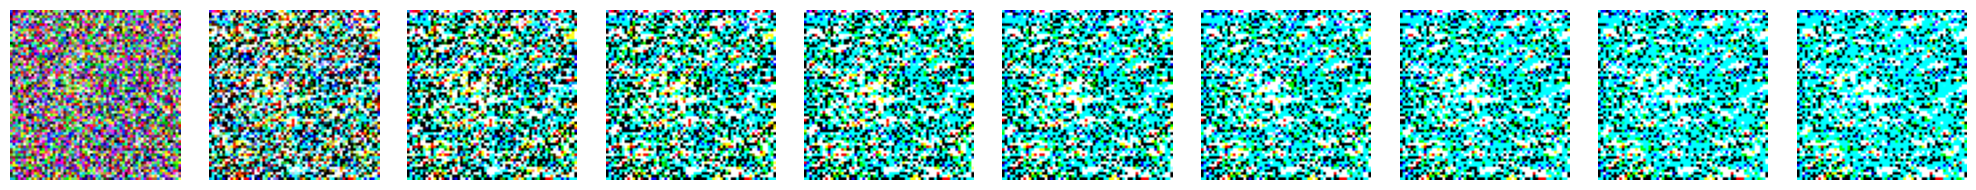

In [219]:
n_rows = 1
n_cols = 10
T = 1000
steps = int(T / n_cols)

visualize_images(reverse_process_list[::steps], n_rows=n_rows, n_cols=n_cols)
